In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Membaca dua dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\dailyIntensities_merged.csv')
# Menggabungkan dua dataset menjadi satu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [3]:
df.head(939)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.00,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.00,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.00,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.00,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.00,5.04,0.41,2.71
...,...,...,...,...,...,...,...,...,...,...
934,8877689391,5/7/2016,1036,271,28,105,0.00,6.99,0.96,0.08
935,8877689391,5/8/2016,1174,245,4,17,0.00,6.80,0.20,1.08
936,8877689391,5/9/2016,1131,217,19,73,0.05,6.24,0.80,11.10
937,8877689391,5/10/2016,1187,224,11,18,0.00,6.28,0.46,1.35


In [4]:
#create coloums baru yang bernama total minutes
df['totalMinutes'] = (df['SedentaryMinutes'] 
                       + df['LightlyActiveMinutes'] 
                       + df['FairlyActiveMinutes'] 
                       + df['VeryActiveMinutes'])

df['totalDistance'] = (df['SedentaryActiveDistance']
                       + df['LightActiveDistance']
                       + df['ModeratelyActiveDistance']
                       + df['VeryActiveDistance'])
df

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,totalMinutes,totalDistance
0,1503960366,4/12/2016,728,328,13,25,0.00,6.06,0.55,1.88,1094,8.49
1,1503960366,4/13/2016,776,217,19,21,0.00,4.71,0.69,1.57,1033,6.97
2,1503960366,4/14/2016,1218,181,11,30,0.00,3.91,0.40,2.44,1440,6.75
3,1503960366,4/15/2016,726,209,34,29,0.00,2.83,1.26,2.14,998,6.23
4,1503960366,4/16/2016,773,221,10,36,0.00,5.04,0.41,2.71,1040,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,1174,245,4,17,0.00,6.80,0.20,1.08,1440,8.08
936,8877689391,5/9/2016,1131,217,19,73,0.05,6.24,0.80,11.10,1440,18.19
937,8877689391,5/10/2016,1187,224,11,18,0.00,6.28,0.46,1.35,1440,8.09
938,8877689391,5/11/2016,1127,213,12,88,0.00,5.89,0.41,13.22,1440,19.52


hasil statistik deskriptif diatas :
* SedentaryMinutes: Tidak Beraktivitas selama beberapa memiliki nilai Q1 sebesar 729 dan nilai max sebesar 1440
* SedentaryActiveDistance: 

In [5]:
df_obj = df[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 
             'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance', 
             'ModeratelyActiveDistance', 'VeryActiveDistance','totalMinutes','totalDistance']].astype(str)
#
statistik_deskriptif = df_obj.describe()
statistik_deskriptif

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,totalMinutes,totalDistance
count,940,940,940,940,940,940,940,940,940,940
unique,549,335,81,122,9,491,211,333,301,799
top,1440,0,0,0,0.0,0.0,0.0,0.0,1440,0.0
freq,79,84,384,409,858,85,386,413,478,85


### Descriptive Analysis Summary

1. *Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?*<br> semua tipe data sudah sesuai dengan dataset dailyintensity 

2. *Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?*<br>
   tidak terdapat nilai null pada kolom dataset dailyintensity

3. *Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)*<br>
  pada kolom 'SedentaryMinutes' memiliki nilai unique yang tinggi sebesar 549 , sedangkan 'SedentaryActiveDistance' memiliki nilai terendah sebesar 9 dibandingkan dengan kolom lainnya dan begitu sebaliknya pada freq kolom 'SedentaryMinutes' memiliki nilai terendah  sebesar 79 , sedangkan 'SedentaryActiveDistance'memiliki nilai tertinggi sebesar 858

In [6]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Id','ActivityDay']
nums = ['SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes','SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance','totalMinutes','totalDistance']

In [7]:
df[nums].describe()

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,totalMinutes,totalDistance
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681,1218.753191,5.412649
std,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941,265.931767,3.936421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,989.750000,2.540000
50%,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000,1440.000000,5.175000
75%,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500,1440.000000,7.637500
max,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000,1440.000000,28.040000


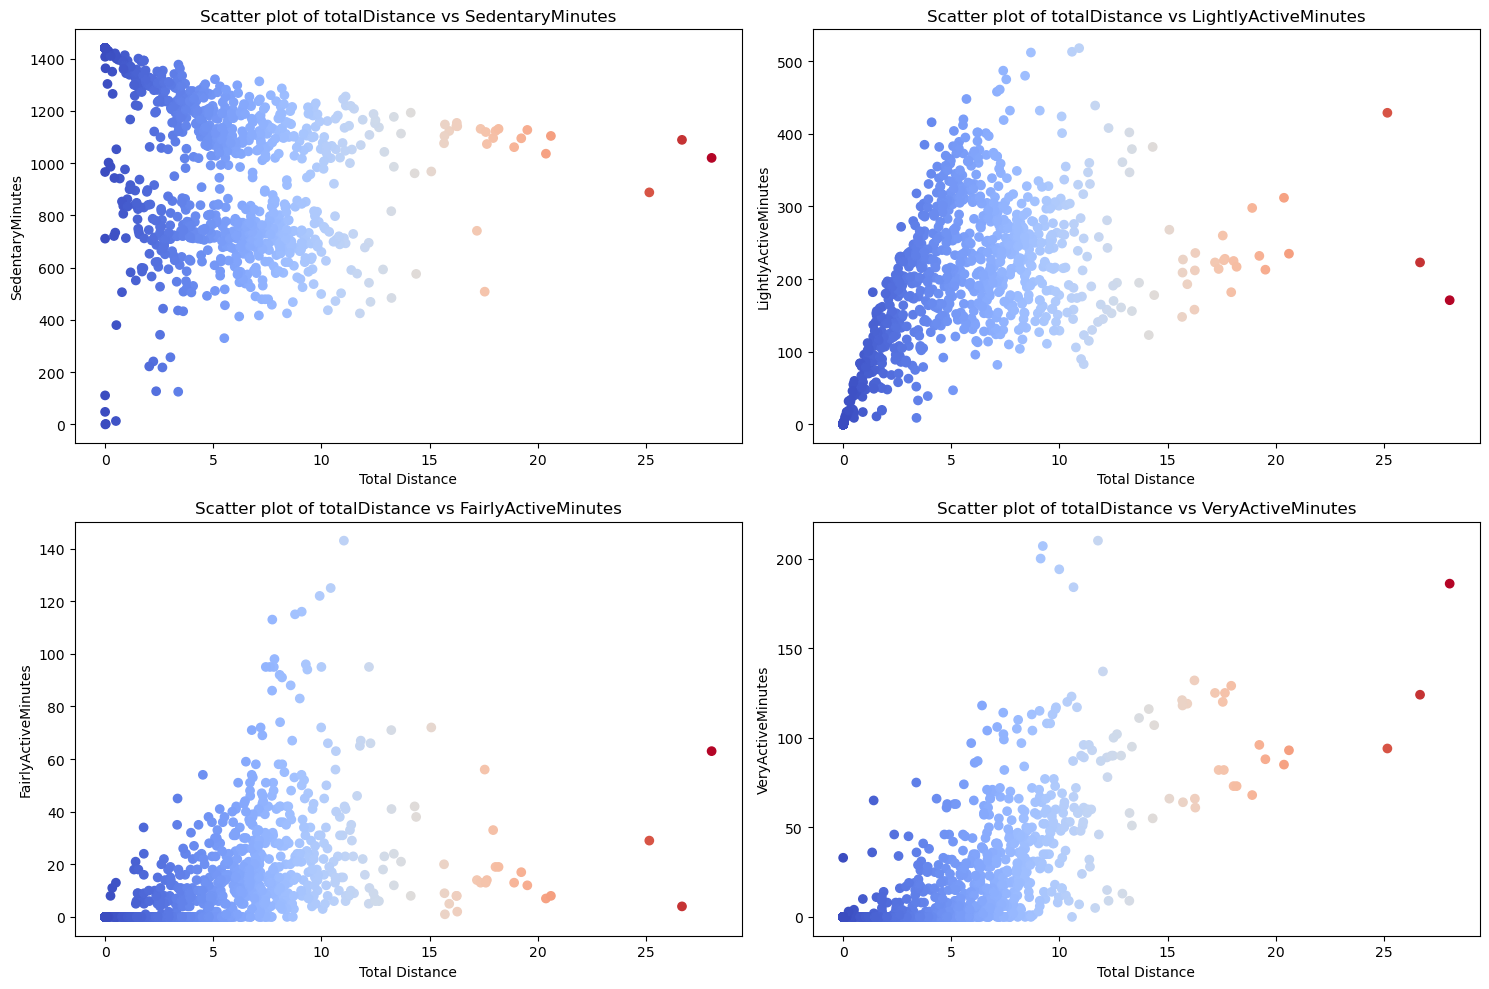

In [8]:
# mencari totalDistance pada masing" y_columns
y_columns = ['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  

for i, y_col in enumerate(y_columns):
    ax = axes[i // 2, i % 2]  # Access the correct subplot
    palette = sns.color_palette("coolwarm", as_cmap=True)
    scatter = ax.scatter(df['totalDistance'], df[y_col], c=df['totalDistance'], cmap=palette)
    ax.set_title(f'Scatter plot of totalDistance vs {y_col}')
    ax.set_xlabel('Total Distance')
    ax.set_ylabel(y_col)

plt.tight_layout()
plt.show()


 **scatter plot of totalDistance vs SedentaryMinutes** : user cenderung menghabiskan waktu dengan beristirahat(break) pada menit 400 -1400 itu terlihat pada scetter plot yang berwarna biru dan hanya 3 user saja yang melanjutkan aktivitas jogging(berlari kecil) sampai menempuh jarak 15-25+ km pada titik-titik yang berwarna pink kemerahan.

 **scatter plot of totalDistance vs LightlyActiveMinutes** : terlihat adanya peningkatan pada lightlyactiveminutes, banyak user melakukan aktivitas ringan seperti berjogging/berlari itu terlihat pada jumlah menit  yang lebih sedikit(berkisar 0-500 minutes dapat menempuh jarak 0-25+)/setengah dari tanpa beraktivitas(SedentaryMinutes) dan hanya 3 orang yang menempuh jarak 25+km kemungkinan itu orang yang sama.

 **scatter plot of totalDistance vs FairlyActiveminutes** : pada scatter ini pengguna cenderung menghabiskan waktu dengan menggunakan sepeda atau hanya seorang sprinter/pelari maraton saja yang mampu melakukan itu. terlihat dari jarak yang ditempuh 0-25+km kebanyakkan hanya membutuh waktu kurang dari 1 jam(60 menit).

 **scatter plot of totalDistance vs VeryActiveMinutes** : pada scatter ini sama dengan scatter fairlyactivedistance tapi beberapa orang cenderung berlari itu terlihat dari waktu yang lebih besar dibandingkan dengan fairlyactiveminutes kemungkinan mereka adalah seorang sprinter/pelari maraton dan hanya 3 orang yang berhasil menempuh jarak 25+km kemungkinan itu merupakan orang yang sama pada secendaryminutes,lightlyactiveminutes dan fairlyactiveminutes.


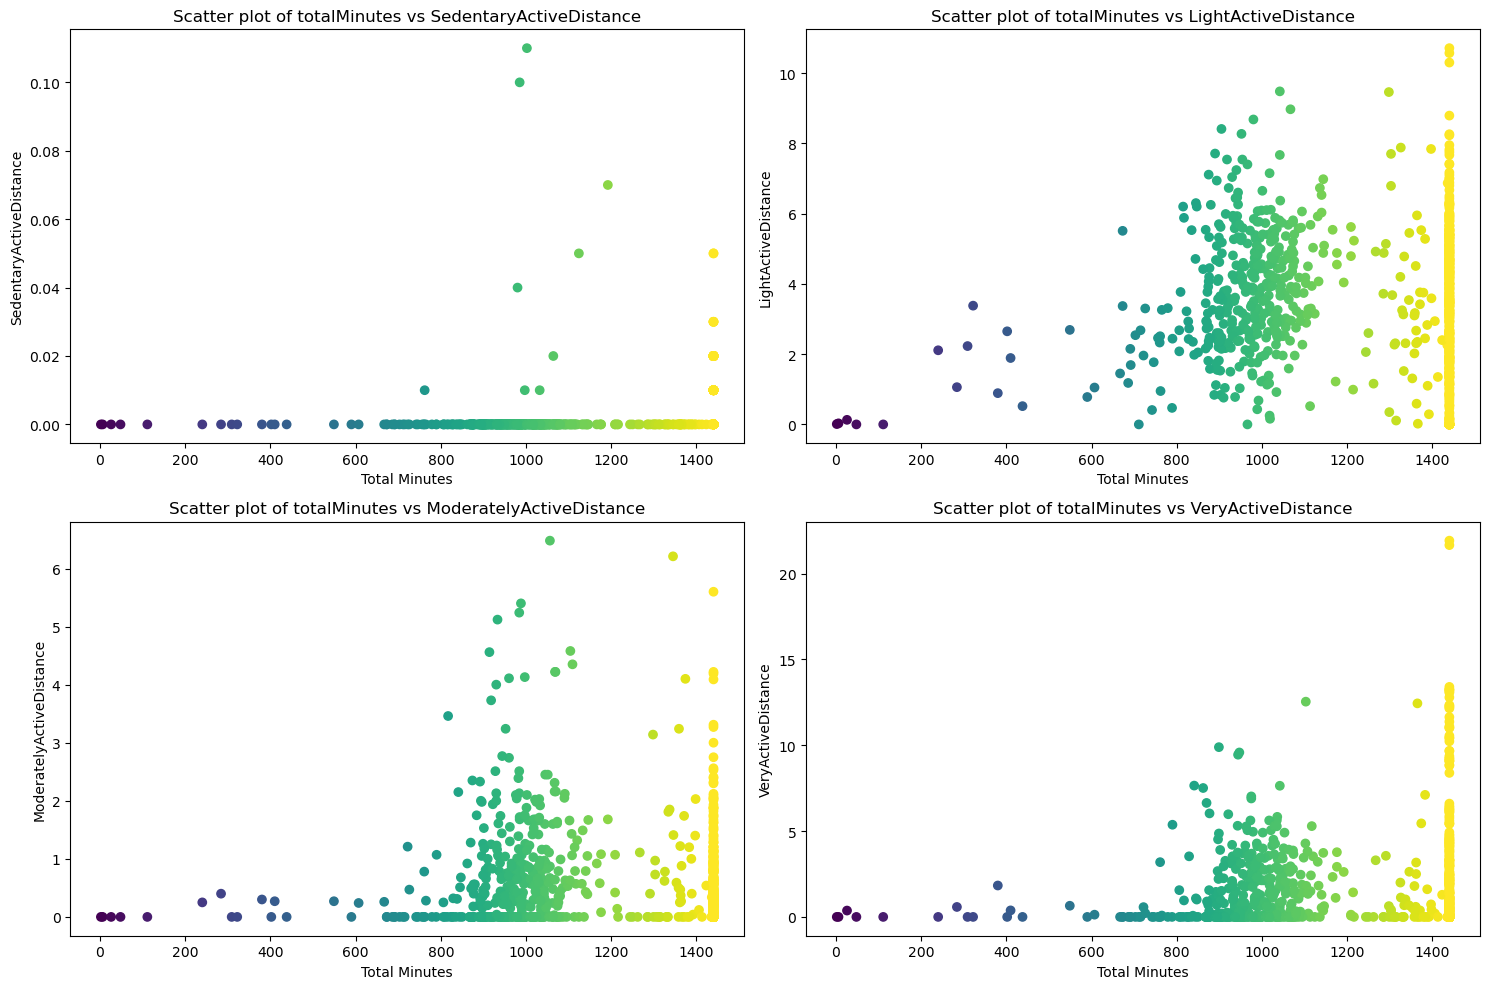

In [9]:
# mencari pTotalDistance terhadap y_colums
y_columns = ['SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance']
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 
for i, y_col in enumerate(y_columns):
    plt.subplot(2, 2, i+1)
    plt.scatter(df['totalMinutes'], df[y_col], c=df['totalMinutes'], cmap='viridis')
    plt.title(f'Scatter plot of totalMinutes vs {y_col}')
    plt.xlabel('Total Minutes')
    plt.ylabel(y_col)
plt.tight_layout()
plt.show()

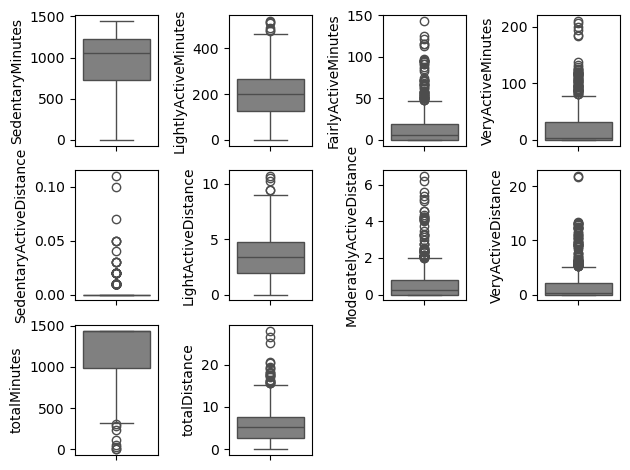

In [11]:
for i in range(0, len(nums)):
    plt.subplot( 3, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='grey', orient='v')
    plt.tight_layout()

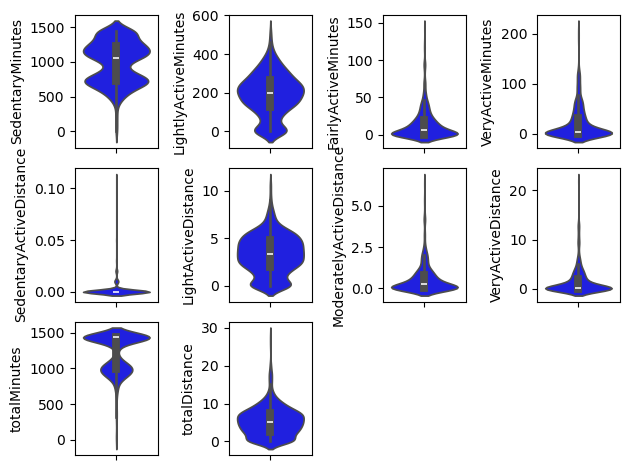

In [12]:
for i in range(0, len(nums)):
    plt.subplot(3,4 , i+1)
    sns.violinplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

## apa saja atribute yang terdapat pada dataset dailyIntensity
 * Id : Identitas Diri Pengguna
 * ActivityDay : Berapa hari Aktivitas dilakukan.  
 * SedentaryMinutes	: jumlah waktu tidak beraktivitas. 
 * LightlyActiveMinute : Jumlah menit yang dihabiskan untuk aktivitas ringan.
 * FairlyActiveMinutes : jumlah menit yang dihabiskan untuk aktivitas cukup aktif. 
 * VeryActiveMinutes : jumlah menit yang dihabiskan untuk aktivitas sangat aktif.
 * SedentaryActiveDistance : Jarak yang tidak bergerak(Break)saat beraktivitas.
 * LightActiveDistance	: jumlah jarak(km) yang ditempuh saat aktivitas ringan.
 * ModeratelyActiveDistance	: jumlah jarak(km) yang ditempuh saat aktivitas cukup aktif.
 * VeryActiveDistance : jumlah jarak(km) yang ditempuh saat aktivitas sangat aktif.
 * totalMinutes : jumlah keseluruhan waktu dalam melakukan segala aktivitas R